<a href="https://colab.research.google.com/github/AsrarH/Image_classification/blob/master/Image_classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the necessary modules
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:

#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Training data:


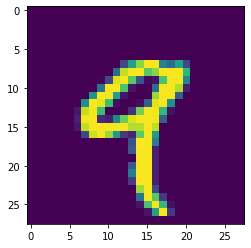

Label of this image is 9


In [3]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])

In [4]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [5]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [7]:
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [8]:
#importing the model
from keras.models import Sequential

In [9]:
#creating model object
model=Sequential()

In [10]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [11]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

In [12]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
#training the model
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 157s 3ms/step - loss: 0.1511 - accuracy: 0.9518 - val_loss: 0.0652 - val_accuracy: 0.9796
Epoch 2/5
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0418 - accuracy: 0.9872 - val_loss: 0.0285 - val_accuracy: 0.9904
Epoch 3/5
60000/60000 [==============================] - 155s 3ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0271 - val_accuracy: 0.9913
Epoch 4/5
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0245 - val_accuracy: 0.9919
Epoch 5/5
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0269 - val_accuracy: 0.9909


In [20]:
#model train and test scores
train_loss, train_accuracy = model.evaluate(xtrain,y_train)
print('test data loss:', train_loss)
print('test data accuracy', train_accuracy * 100)

test_loss, test_accuracy = model.evaluate(xtest,y_test)
print('test data loss:', test_loss)
print('test data accuracy', test_accuracy * 100)

60000/60000 [==============================] - 43s 709us/step
test data loss: 0.014297585274201507
test data accuracy 99.57000017166138
10000/10000 [==============================] - 7s 708us/step
test data loss: 0.02686886332911672
test data accuracy 99.08999800682068
